# TDA: Mapper

## Preparación de Datos

Importación de Librerías

In [43]:
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.preprocessing import RobustScaler
import kmapper as km
import umap
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [44]:
#Importación de datos
data = pd.read_csv("tabla_todas_variables_inner.csv")

Se quita una columna sin información y se inputan datos de fuentes externas, para rellenar valores nulos.

In [45]:
data.drop(columns = ["Unnamed: 0"], inplace = True)
data.loc[0:6, 'China - Iron Ore'] = [75.78,77.65,71.32,66.33,66.33,66.86,67.05]

Se traspone la matriz para que cada registro represente la serie de tiempo de algún factor. 

In [46]:
data_t = data.T

Se ajustan los nombres de las columnas

In [47]:
data_t.columns = data_t.iloc[0]
data_t = data_t[1:]
data_t.head()

Fecha,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
Total,-2.9,-2.1,1.2,-4.3,5.2,-0.6,-0.5,-2.8,1.0,0.1,...,5.3,5.8,8.7,5.3,7.3,3.4,2.0,-1.4,-1.1,-2.8
Edificación,-3.5,-4.7,3.2,-4.8,6.9,-0.7,-2.8,-0.2,1.4,-3.9,...,0.8,0.1,3.5,2.6,-0.3,6.6,1.2,0.6,1.9,0.0
"Agua, riego y saneamiento",44.4,-3.0,12.8,-8.9,4.7,2.7,-3.1,-6.3,6.7,4.6,...,34.1,2.2,-4.9,-11.9,-3.3,12.1,9.2,-13.9,4.8,1.8
Electricidad y comunicaciones,-6.4,-5.1,0.6,-7.5,0.0,-3.3,2.3,0.1,6.7,10.9,...,-7.7,27.6,16.5,5.2,6.9,4.1,8.4,-6.4,-1.9,-5.5
Transporte,-5.0,1.7,-1.0,-2.3,3.3,2.7,-2.6,-4.9,-3.8,5.3,...,10.3,22.5,24.9,11.5,22.6,3.4,4.6,-11.2,0.8,-4.2


Se revisa que no haya valores nulos

In [48]:
data_t[data_t.isnull().any(axis=1)]

Fecha,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12


Se realiza normalización por columna, es decir, por serie de tiempo

In [49]:
normalized_array = normalize(data_t, axis=1, norm='l2') 

## Proyecciones Mapper

In [50]:
isomap_model = Isomap(n_components=min(20, normalized_array.shape[1]), n_jobs=-1)
projected_isomap = isomap_model.fit_transform(normalized_array)

In [64]:
umap_model2D = umap.UMAP(
    n_components=2,  
    n_neighbors=10,  
    min_dist=0.1,    
    metric='euclidean'  
)
projected_umap2D = umap_model2D.fit_transform(normalized_array)

c:\Users\chuby\anaconda3\envs\topo\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [65]:
tsne_model = TSNE(
    n_components=2,
    perplexity=50,   
    metric='correlation'
)

projected_tsne = tsne_model.fit_transform(normalized_array)

In [66]:
pca_model = PCA(n_components=2, random_state=42)
projected_pca = pca_model.fit_transform(normalized_array)

In [67]:
mapper = km.KeplerMapper(verbose=1)

KeplerMapper(verbose=1)


## Funciones para Mapper

Función que genera el mapper y lo visualiza, para cambiar el clusterizador, es manualmente. 
Se da el nombre de la proyección, la cantidad de cubos, overlap, la proyección, 
y como se usa dbscan se necesitan los valores para eps, min_samples y metric. 

In [ ]:
def mapping(nombre, cubes, overlap, projected_data, ep, samples, met):
    
    covering = km.Cover(n_cubes=cubes, perc_overlap=overlap)
    print(covering)

    G = mapper.map(
        projected_data,
        normalized_array,
        cover=covering,
        clusterer=DBSCAN(eps=ep, min_samples=samples, metric=met) #AgglomerativeClustering(n_clusters=3, linkage = "average") 
    )
    print(G['meta_data'])

    nombre_html = f"{nombre}.html"
    mapper.visualize(
        G,
        title=f"Mapper - {nombre}",
        path_html=nombre_html,
        color_values=normalized_array[:, 1],
        color_function_name='Valor',
        node_color_function=np.array(['average', 'std', 'sum', 'max', 'min'])
    )

    return G 


## Presentación de Resultados

Asigna los puntos según el nodo al que pertencen

In [70]:
# Función para obtener nodos de los mapper
def clusters_nodo(G, index_to_ticker):
    clusters = {}
    for node in G["nodes"]:
        clusters[node] = [index_to_ticker[idx] for idx in G["nodes"][node]]
    return clusters

Nos da algunos datos de los clusters, cuántos hay, cuántos elementos tiene etc. 

In [ ]:
def info_clusters(clusters):
    cluster_sizes = {cluster: len(tickers) for cluster, tickers in clusters.items()}
    print(f"Número de clusters: {len(clusters)}")
    print(f"Promedio de elementos por cluster: {np.mean(list(cluster_sizes.values())):.2f}")
    print(f"Cluster más grande: {max(cluster_sizes, key=cluster_sizes.get)} con {max(cluster_sizes.values())} elementos")
    print(f"Cluster más pequeño: {min(cluster_sizes, key=cluster_sizes.get)} con {min(cluster_sizes.values())} elementos")

Función para graficar las proyecciones y los clusters (solo funciona para 2D)

In [ ]:
def plot_clusters(clusters, projected):
    plt.figure(figsize=(8, 6))
    colors = plt.cm.tab20(np.linspace(0, 1, len(clusters)))
    color_map = {}
    for i, cluster_name in enumerate(clusters.keys()):
        color_map[cluster_name] = colors[i]

    leyenda_agregada = set()

    for i, ticker in enumerate(data_t.index):
        point_clusters = [c for c, tickers in clusters.items() if ticker in tickers]
        
        if point_clusters:
            cluster = point_clusters[0]
            x, y = projected[i, 0], projected[i, 1]
            if cluster not in leyenda_agregada:
                plt.scatter(x, y, color=color_map[cluster], alpha=0.7, s=50, label=cluster)
                leyenda_agregada.add(cluster)
            else:
                plt.scatter(x, y, color=color_map[cluster], alpha=0.7, s=50)

            if len(point_clusters) > 1:
                plt.scatter(x, y, facecolors='none', edgecolors='black', s=80)

    plt.title('Espacio de proyección')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Llama las funciones anteriores para mostrar todo lo obtenido de alguna proyección, y su mapa. Se imprime a que clusters pertenecen las variables de interés "PLANOS", "Lámina con Recubrimiento".

In [73]:
def info_show(map, projected):
    index_to_ticker = dict(enumerate(data_t.index))
    ticker_to_index = {ticker: idx for idx, ticker in index_to_ticker.items()}
    clusters= clusters_nodo(map, index_to_ticker)
    info_clusters(clusters)
    plot_clusters(clusters, projected)
    valor = "PLANOS"
    for nombre, lista in clusters.items():
        if valor in lista:
            print(f"{nombre}: {lista}")
    
    valor = "Lámina con Recubrimiento"
    for nombre, lista in clusters.items():
        if valor in lista:
            print(f"{nombre}: {lista}")


Cover(n_cubes=5, perc_overlap=0.2, limits=None, verbose=0)
Mapping on data shaped (304, 72) using lens shaped (304, 2)

Creating 25 hypercubes.

Created 38 edges and 20 nodes in 0:00:00.066159.
{'projection': 'custom', 'n_cubes': 5, 'perc_overlap': 0.2, 'clusterer': "DBSCAN(eps=0.3, metric='chebyshev', min_samples=7)", 'scaler': 'None', 'nerve_min_intersection': 1}
Wrote visualization to: UMAP.html
Número de clusters: 20
Promedio de elementos por cluster: 18.80
Cluster más grande: cube13_cluster0 con 29 elementos
Cluster más pequeño: cube0_cluster0 con 7 elementos


c:\Users\chuby\anaconda3\envs\topo\lib\site-packages\kmapper\visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
c:\Users\chuby\anaconda3\envs\topo\lib\site-packages\kmapper\visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


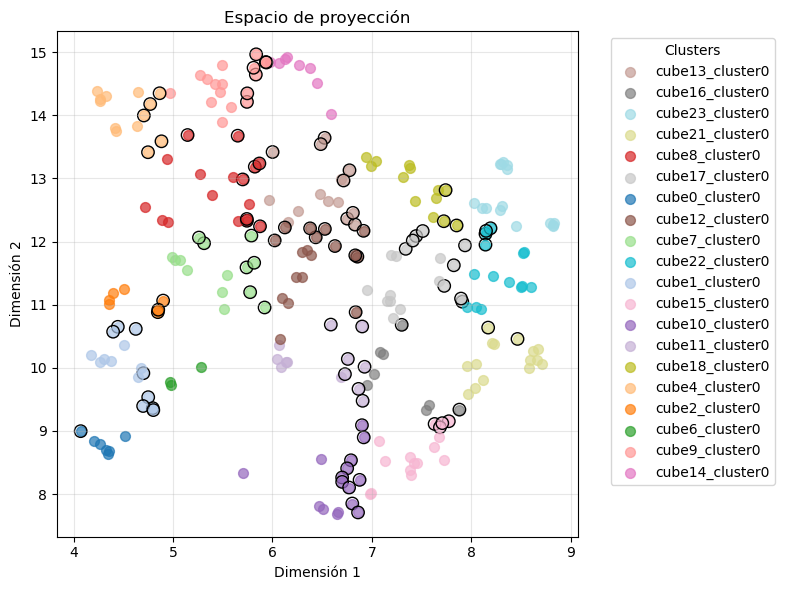

cube12_cluster0: ['consumo_laminados_méxico', 'consumo_planos_bolivia', 'consumo_tubos sin costura_paraguay', 'expo_laminados_guatemala', 'expo_laminados_méxico', 'expo_laminados_panamá', 'expo_largos_guatemala', 'expo_largos_panamá', 'expo_planos_el_salvador', 'expo_planos_guatemala', 'expo_planos_panamá', 'impo_planos_bolivia', 'impo_tubos sin costura_paraguay', 'prod_hierro esponja_argentina', 'prod_laminados_méxico', 'prod_planos_méxico', 'Barras', 'Ferroaleaciones', 'Fierro Esponja', 'Granallas y Polvos', 'Mineral de Hierro', 'PLANOS', 'Perfiles Comerciales formados en Caliente', 'Planos de Acero Aleado', 'Varilla Corrugada']
cube13_cluster0: ['consumo_laminados_argentina', 'consumo_laminados_ecuador', 'consumo_laminados_méxico', 'consumo_largos_argentina', 'consumo_largos_méxico', 'consumo_planos_ecuador', 'consumo_planos_méxico', 'consumo_tubos sin costura_uruguay', 'expo_laminados_el_salvador', 'expo_laminados_guatemala', 'expo_laminados_perú', 'expo_largos_el_salvador', 'expo_

In [74]:
G_umap = mapping("UMAP",5,0.2,projected_umap2D,0.3,7,"chebyshev")
info_show(G_umap,projected_umap2D)

Cover(n_cubes=5, perc_overlap=0.2, limits=None, verbose=0)
Mapping on data shaped (304, 72) using lens shaped (304, 2)

Creating 25 hypercubes.

Created 35 edges and 18 nodes in 0:00:00.056371.
{'projection': 'custom', 'n_cubes': 5, 'perc_overlap': 0.2, 'clusterer': "DBSCAN(eps=0.15, metric='chebyshev', min_samples=7)", 'scaler': 'None', 'nerve_min_intersection': 1}
Wrote visualization to: TSNE.html
Número de clusters: 18
Promedio de elementos por cluster: 18.94
Cluster más grande: cube17_cluster0 con 38 elementos
Cluster más pequeño: cube2_cluster0 con 7 elementos


c:\Users\chuby\anaconda3\envs\topo\lib\site-packages\kmapper\visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
c:\Users\chuby\anaconda3\envs\topo\lib\site-packages\kmapper\visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


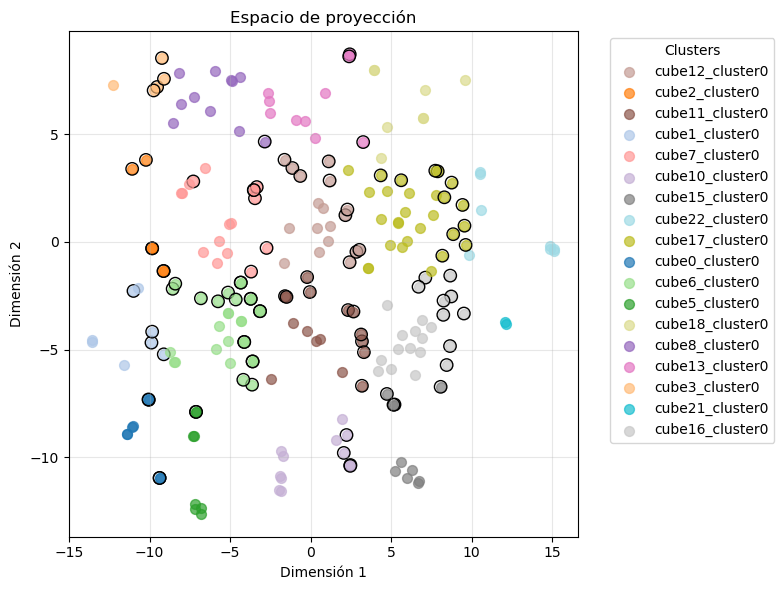

cube17_cluster0: ['consumo_laminados_méxico', 'consumo_largos_méxico', 'consumo_planos_méxico', 'consumo_planos_república_dominicana', 'consumo_tubos sin costura_argentina', 'impo_laminados_argentina', 'impo_laminados_brasil', 'impo_laminados_méxico', 'impo_largos_brasil', 'impo_largos_méxico', 'impo_planos_argentina', 'impo_planos_brasil', 'impo_planos_méxico', 'impo_tubos sin costura_méxico', 'prod_h.eléctrico_perú', 'prod_laminados_méxico', 'prod_laminados_perú', 'prod_largos_méxico', 'prod_largos_perú', 'prod_planos_república_dominicana', 'Caliente', 'Chatarra', 'Lámina con Recubrimiento', 'PLANOS', 'Perfiles Estructurales (Caliente y Frío)', 'Planchón', 'Planos de Acero Aleado', 'Planos de Acero al Silicio', 'TUBOS CON Y SIN COSTURA', 'Tubos c/Costura > 406.4 mm', 'Tubos c/Costura ≤ 406.4 mm', 'Tubos con Costura', 'Varilla Corrugada', '01.01 PLACA DE ROLLO', '02.01 LAMINA EN CALIENTE', '04.01 LAMINA GALVANIZADA', 'wBeamsPerfilesEstructurales', 'anglePerfilesComerciales']
cube17_cl

In [75]:
G_tsne = mapping("TSNE",5,0.2,projected_tsne,0.15,7,"chebyshev")
info_show(G_tsne,projected_tsne)

Cover(n_cubes=3, perc_overlap=0.2, limits=None, verbose=0)
Mapping on data shaped (304, 72) using lens shaped (304, 2)

Creating 9 hypercubes.

Created 7 edges and 6 nodes in 0:00:00.030113.
{'projection': 'custom', 'n_cubes': 3, 'perc_overlap': 0.2, 'clusterer': "DBSCAN(eps=0.8, metric='chebyshev', min_samples=2)", 'scaler': 'None', 'nerve_min_intersection': 1}
Wrote visualization to: PCA.html
Número de clusters: 6
Promedio de elementos por cluster: 57.83
Cluster más grande: cube5_cluster0 con 254 elementos
Cluster más pequeño: cube0_cluster0 con 2 elementos


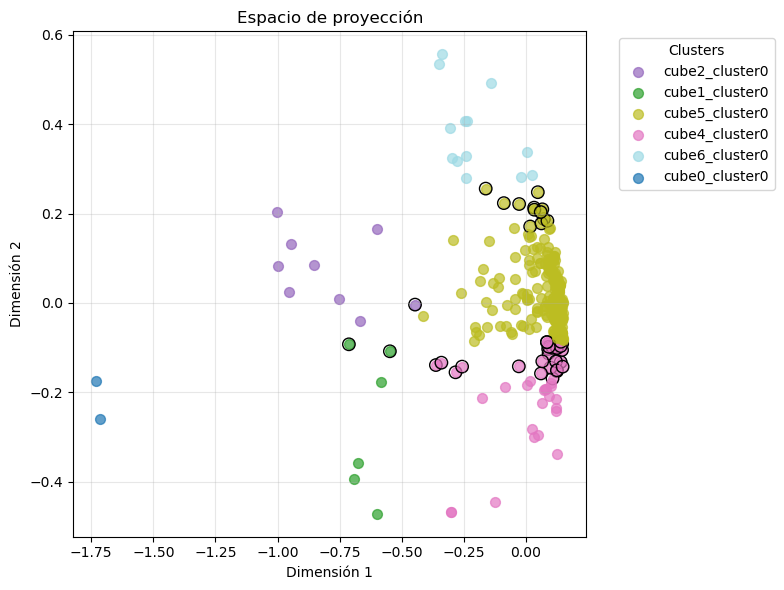

cube5_cluster0: ['consumo_laminados_argentina', 'consumo_laminados_bolivia', 'consumo_laminados_brasil', 'consumo_laminados_chile', 'consumo_laminados_colombia', 'consumo_laminados_costa_rica', 'consumo_laminados_ecuador', 'consumo_laminados_el_salvador', 'consumo_laminados_guatemala', 'consumo_laminados_honduras', 'consumo_laminados_méxico', 'consumo_laminados_panamá', 'consumo_laminados_paraguay', 'consumo_laminados_perú', 'consumo_laminados_república_dominicana', 'consumo_laminados_uruguay', 'consumo_laminados_venezuela', 'consumo_largos_argentina', 'consumo_largos_bolivia', 'consumo_largos_brasil', 'consumo_largos_chile', 'consumo_largos_colombia', 'consumo_largos_costa_rica', 'consumo_largos_ecuador', 'consumo_largos_el_salvador', 'consumo_largos_guatemala', 'consumo_largos_honduras', 'consumo_largos_méxico', 'consumo_largos_panamá', 'consumo_largos_paraguay', 'consumo_largos_perú', 'consumo_largos_república_dominicana', 'consumo_largos_uruguay', 'consumo_largos_venezuela', 'consu

In [76]:
G_pca = mapping("PCA",3,0.2,projected_pca,0.8,2,"chebyshev")
info_show(G_pca,projected_pca)